In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten

from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D



In [169]:
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [170]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [19]:
data = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv')

In [20]:
data

,date,NDVI_p1
0,"Jan 4, 2021",0.659753
1,"Jan 9, 2021",0.525199
2,"Jan 14, 2021",0.010833
3,"Jan 19, 2021",0.646873
4,"Feb 3, 2021",0.098306
5,"Feb 8, 2021",0.747664
6,"Feb 18, 2021",0.696852
7,"Feb 23, 2021",0.806154
8,"Feb 28, 2021",0.774941
9,"Mar 5, 2021",0.818840


In [177]:
# Define the number of time steps to consider in each input sequence
n_steps = 3

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train_3, y_train_3 = create_sequences(dataset_normalized, n_steps)

# Reshape the input data to be compatible with the LSTM model
X_train_3 = X_train_3.reshape(X_train_3.shape[0], X_train_3.shape[1], 1)



In [178]:



# Create the LSTM model
model = Sequential()
model.add(LSTM(200, activation='tanh', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [179]:
# Train the model
model.fit(X_train_3, y_train_3, epochs=500, batch_size=32)


Epoch 1/500
2/2 [==============================] - 2s 20ms/step - loss: 0.3616
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2936
Epoch 3/500
2/2 [==============================] - 0s 17ms/step - loss: 0.2324
Epoch 4/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1770
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1322
Epoch 6/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0946
Epoch 7/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0699
Epoch 8/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0561
Epoch 9/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0556
Epoch 10/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0657
Epoch 11/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0720
Epoch 12/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0718
Epoch 13/500
2/2 [==============================]

2/2 [==============================] - 0s 12ms/step - loss: 0.0511
Epoch 104/500
2/2 [==============================] - 0s 9ms/step - loss: 0.0509
Epoch 105/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0506
Epoch 106/500
2/2 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 107/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0508
Epoch 108/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0507
Epoch 109/500
2/2 [==============================] - 0s 0s/step - loss: 0.0506
Epoch 110/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0505
Epoch 111/500
2/2 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 112/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0505
Epoch 113/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0505
Epoch 114/500
2/2 [==============================] - 0s 1ms/step - loss: 0.0506
Epoch 115/500
2/2 [=============================

2/2 [==============================] - 0s 12ms/step - loss: 0.0481
Epoch 205/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0485
Epoch 206/500
2/2 [==============================] - 0s 12ms/step - loss: 0.0483
Epoch 207/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0481
Epoch 208/500
2/2 [==============================] - 0s 11ms/step - loss: 0.0482
Epoch 209/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0482
Epoch 210/500
2/2 [==============================] - 0s 2ms/step - loss: 0.0486
Epoch 211/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0485
Epoch 212/500
2/2 [==============================] - 0s 2ms/step - loss: 0.0482
Epoch 213/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0479
Epoch 214/500
2/2 [==============================] - 0s 12ms/step - loss: 0.0481
Epoch 215/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0481
Epoch 216/500
2/2 [=========================

2/2 [==============================] - 0s 13ms/step - loss: 0.0419
Epoch 306/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0417
Epoch 307/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0417
Epoch 308/500
2/2 [==============================] - 0s 4ms/step - loss: 0.0416
Epoch 309/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0414
Epoch 310/500
2/2 [==============================] - 0s 4ms/step - loss: 0.0414
Epoch 311/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0412
Epoch 312/500
2/2 [==============================] - 0s 4ms/step - loss: 0.0409
Epoch 313/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0412
Epoch 314/500
2/2 [==============================] - 0s 5ms/step - loss: 0.0410
Epoch 315/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0404
Epoch 316/500
2/2 [==============================] - 0s 6ms/step - loss: 0.0405
Epoch 317/500
2/2 [=============================

2/2 [==============================] - 0s 0s/step - loss: 0.0376
Epoch 407/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0381
Epoch 408/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0377
Epoch 409/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0374
Epoch 410/500
2/2 [==============================] - 0s 0s/step - loss: 0.0375
Epoch 411/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0374
Epoch 412/500
2/2 [==============================] - 0s 0s/step - loss: 0.0369
Epoch 413/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0377
Epoch 414/500
2/2 [==============================] - 0s 0s/step - loss: 0.0383
Epoch 415/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0383
Epoch 416/500
2/2 [==============================] - 0s 0s/step - loss: 0.0373
Epoch 417/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0373
Epoch 418/500
2/2 [==============================] -

In [181]:

# Generate predictions on the training data
y_pred_normalized_3 = model.predict(X_train_3)

# Inverse transform to get the original scale
y_pred_3 = scaler.inverse_transform(y_pred_normalized_3)

2/2 [==============================] - 0s 8ms/step


In [148]:
#import the essential library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, general_gaussian
import statsmodels

In [85]:
#loading of the data

data=pd.read_csv("E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv")
#values put into different array
x = data['date'].values   #date
y = data['NDVI_p1'].values   #NDVI values


In [86]:
data_copy1= data.copy()

In [87]:
data_copy1['date'] = pd.to_datetime(data_copy1['date'])
print(data_copy1.dtypes)
import pandas as pddate

# Assuming 'system:time_start' is already in a datetime format
data_copy1['Month'] = data_copy1['date'].dt.strftime('%b')


date       datetime64[ns]
NDVI_p1           float64
dtype: object


In [88]:
w2=5
p2=2
y_smooth_3 = savgol_filter(y, w2, polyorder = p2, deriv=0)


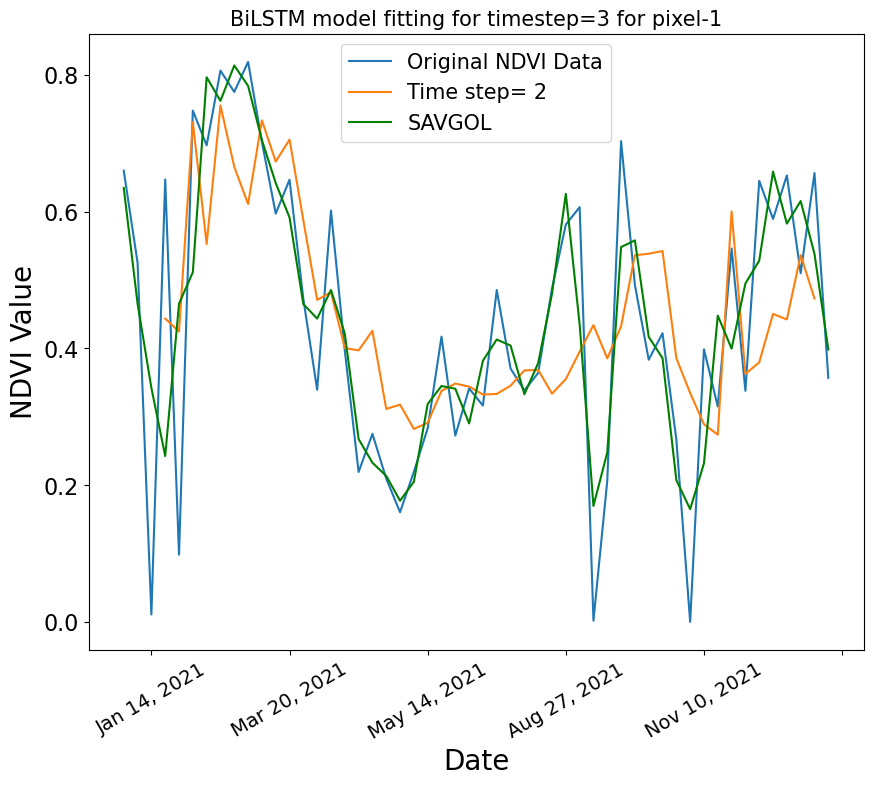

In [182]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.xticks(rotation=30,fontsize=14)
plt.yticks(fontsize=16)
# Plot the original NDVI data
plt.plot(data['date'], data['NDVI_p1'], label='Original NDVI Data')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan

# Shift y_pred_3 by one step backward
y_pred_shifted = y_pred_3[:-1]

plt.plot(np.concatenate([empty_space, y_pred_shifted]), label='Time step= 2')
plt.plot(x, y_smooth_3, 'g', label = 'SAVGOL')
# Set plot labels and title
plt.xlabel('Date',fontsize=20)
plt.ylabel('NDVI Value',fontsize=20)
plt.title('BiLSTM model fitting for timestep=3 for pixel-1',fontsize=15)
plt.legend(fontsize=15)
#plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/Bi_lstm_p3_ts=3.png')
# Show the plot
plt.show()

In [183]:
# Define the number of time steps to consider in each input sequence
n_steps = 3

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train_3_r, y_train_3_r = create_sequences(dataset_normalized, n_steps)

# Reshape the input data to be compatible with the LSTM model
X_train_3_r = X_train_3_r.reshape(X_train_3_r.shape[0], X_train_3_r.shape[1], 1)


# Create the LSTM model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_3, y_train_3, epochs=500, batch_size=32)


Epoch 1/500
2/2 [==============================] - 1s 15ms/step - loss: 0.3860
Epoch 2/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3509
Epoch 3/500
2/2 [==============================] - 0s 14ms/step - loss: 0.3180
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 0.2885
Epoch 5/500
2/2 [==============================] - 0s 18ms/step - loss: 0.2601
Epoch 6/500
2/2 [==============================] - 0s 14ms/step - loss: 0.2321
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 0.2064
Epoch 8/500
2/2 [==============================] - 0s 17ms/step - loss: 0.1800
Epoch 9/500
2/2 [==============================] - 0s 15ms/step - loss: 0.1559
Epoch 10/500
2/2 [==============================] - 0s 14ms/step - loss: 0.1326
Epoch 11/500
2/2 [==============================] - 0s 3ms/step - loss: 0.1111
Epoch 12/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0902
Epoch 13/500
2/2 [==============================] - 

Epoch 104/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0465
Epoch 105/500
2/2 [==============================] - 0s 2ms/step - loss: 0.0466
Epoch 106/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0464
Epoch 107/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0462
Epoch 108/500
2/2 [==============================] - 0s 0s/step - loss: 0.0461
Epoch 109/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0458
Epoch 110/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0456
Epoch 111/500
2/2 [==============================] - 0s 0s/step - loss: 0.0455
Epoch 112/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0454
Epoch 113/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0452
Epoch 114/500
2/2 [==============================] - 0s 0s/step - loss: 0.0451
Epoch 115/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0449
Epoch 116/500
2/2 [================

2/2 [==============================] - 0s 0s/step - loss: 0.0352
Epoch 206/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0350
Epoch 207/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0349
Epoch 208/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0349
Epoch 209/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0349
Epoch 210/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0351
Epoch 211/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0351
Epoch 212/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0348
Epoch 213/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0348
Epoch 214/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0348
Epoch 215/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0346
Epoch 216/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0345
Epoch 217/500
2/2 [=========================

2/2 [==============================] - 0s 12ms/step - loss: 0.0331
Epoch 307/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0330
Epoch 308/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0332
Epoch 309/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0332
Epoch 310/500
2/2 [==============================] - 0s 0s/step - loss: 0.0328
Epoch 311/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0326
Epoch 312/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0329
Epoch 313/500
2/2 [==============================] - 0s 1ms/step - loss: 0.0324
Epoch 314/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0328
Epoch 315/500
2/2 [==============================] - 0s 5ms/step - loss: 0.0331
Epoch 316/500
2/2 [==============================] - 0s 1ms/step - loss: 0.0328
Epoch 317/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0325
Epoch 318/500
2/2 [=============================

2/2 [==============================] - 0s 3ms/step - loss: 0.0295
Epoch 408/500
2/2 [==============================] - 0s 12ms/step - loss: 0.0295
Epoch 409/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0294
Epoch 410/500
2/2 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 411/500
2/2 [==============================] - 0s 0s/step - loss: 0.0291
Epoch 412/500
2/2 [==============================] - 0s 11ms/step - loss: 0.0293
Epoch 413/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0295
Epoch 414/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0292
Epoch 415/500
2/2 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 416/500
2/2 [==============================] - 0s 0s/step - loss: 0.0291
Epoch 417/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0290
Epoch 418/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0292
Epoch 419/500
2/2 [==============================

In [184]:
# Generate predictions on the training data
y_pred_normalized_3 = model.predict(X_train_3_r)

# Inverse transform to get the original scale
y_pred_3_r = scaler.inverse_transform(y_pred_normalized_3)

2/2 [==============================] - 0s 6ms/step


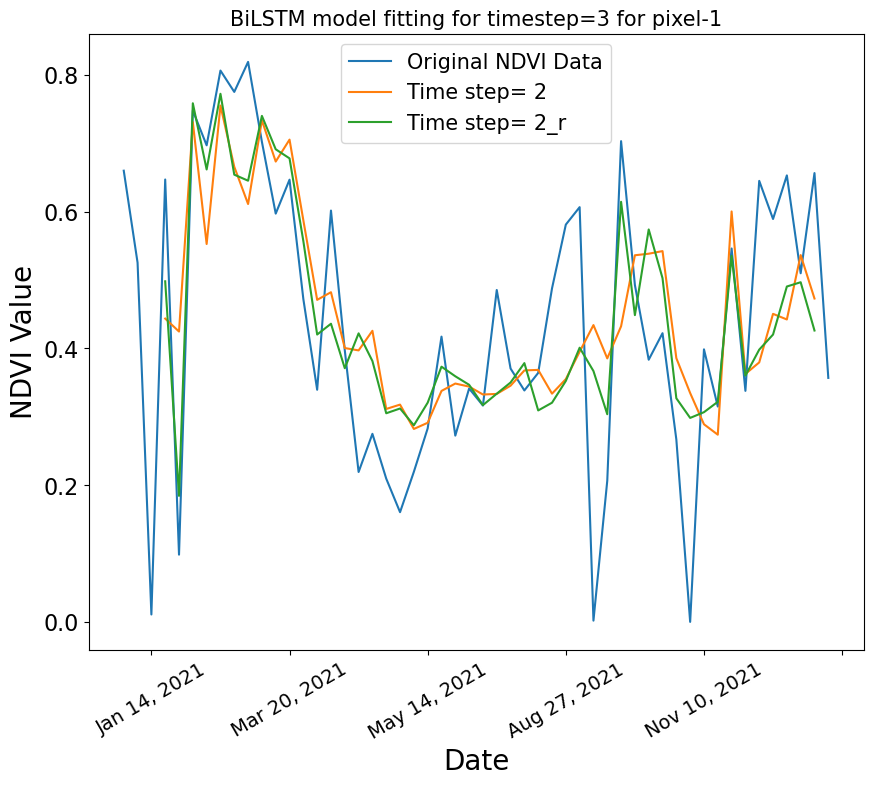

In [186]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.xticks(rotation=30,fontsize=14)
plt.yticks(fontsize=16)
# Plot the original NDVI data
plt.plot(data['date'], data['NDVI_p1'], label='Original NDVI Data')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan

# Shift y_pred_3 by one step backward
y_pred_shifted = y_pred_3[:-1]

plt.plot(np.concatenate([empty_space, y_pred_shifted]), label='Time step= 2')


# Shift y_pred_3 by one step backward
y_pred_shifted = y_pred_3_r[:-1]

plt.plot(np.concatenate([empty_space, y_pred_shifted]), label='Time step= 2_r')



#plt.plot(x, y_smooth_3, 'g', label = 'SAVGOL')
# Set plot labels and title
plt.xlabel('Date',fontsize=20)
plt.ylabel('NDVI Value',fontsize=20)
plt.title('BiLSTM model fitting for timestep=3 for pixel-1',fontsize=15)
plt.legend(fontsize=15)
#plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/Bi_lstm_p3_ts=3.png')
# Show the plot
plt.show()